In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import gc
import warnings
warnings.filterwarnings("ignore")


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.rcParams['figure.figsize'] = 15, 10

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 100

In [10]:
from pnud_textanalysis.basic import *

In [6]:
#Column to analysis
Cols=['JUSTIFICACION_AJUSTE_ENERO_MAY','AVANCE_CAUSA_MES1','AVANCE_CAUSA_MES2','AVANCE_CAUSA_MES3','AVANCE_CAUSA_MES4','AVANCE_CAUSA_MES5',
      'AVANCE_CAUSA_MES6','AVANCE_CAUSA_MES7','AVANCE_CAUSA_MES8','AVANCE_CAUSA_MES9','AVANCE_CAUSA_MES10','AVANCE_CAUSA_MES11',
      'AVANCE_CAUSA_MES12','AVANCE_ENERO_MAYO_CAUSA','AVANCE_EFECTO_MES1','AVANCE_EFECTO_MES2','AVANCE_EFECTO_MES3',
      'AVANCE_EFECTO_MES4','AVANCE_EFECTO_MES5','AVANCE_EFECTO_MES6','AVANCE_EFECTO_MES7','AVANCE_EFECTO_MES8','AVANCE_EFECTO_MES9',
      'AVANCE_EFECTO_MES10','AVANCE_EFECTO_MES11','AVANCE_EFECTO_MES12','AVANCE_ENERO_MAYO_EFECTO','AVANCE_OTROS_MOTIVOS_MES1',
      'AVANCE_OTROS_MOTIVOS_MES2','AVANCE_OTROS_MOTIVOS_MES3','AVANCE_OTROS_MOTIVOS_MES4','AVANCE_OTROS_MOTIVOS_MES5','AVANCE_OTROS_MOTIVOS_MES6',
      'AVANCE_OTROS_MOTIVOS_MES7','AVANCE_OTROS_MOTIVOS_MES8','AVANCE_OTROS_MOTIVOS_MES9','AVANCE_OTROS_MOTIVOS_MES10','AVANCE_OTROS_MOTIVOS_MES11',
      'AVANCE_OTROS_MOTIVOS_MES12','AVANCE_ENERO_MAYO_OTROS_MOTIVO','AVANCE_CAUSA_CP','AVANCE_EFECTO_CP','AVANCE_OTROS_MOTIVOS_CP']


In [7]:
data=load_data(file_path='prog_avance_de_indicadores.csv',columns=Cols)

In [11]:
DF1=aggregation_columns(frame=data,name_col='AVANCE_CAUSA_MES',name_serie='AGG_ACM')

In [12]:
DF2=aggregation_columns(frame=data,name_col='AVANCE_EFECTO_MES',name_serie='AGG_AEM')

In [13]:
DF3=aggregation_columns(frame=data,name_col='AVANCE_OTROS_MOTIVOS_MES',name_serie='AGG_AOMM')

In [14]:
data.head()

,JUSTIFICACION_AJUSTE_ENERO_MAY,AVANCE_CAUSA_MES1,AVANCE_CAUSA_MES2,AVANCE_CAUSA_MES3,AVANCE_CAUSA_MES4,AVANCE_CAUSA_MES5,AVANCE_CAUSA_MES6,AVANCE_CAUSA_MES7,AVANCE_CAUSA_MES8,AVANCE_CAUSA_MES9,AVANCE_CAUSA_MES10,AVANCE_CAUSA_MES11,AVANCE_CAUSA_MES12,AVANCE_ENERO_MAYO_CAUSA,AVANCE_EFECTO_MES1,AVANCE_EFECTO_MES2,AVANCE_EFECTO_MES3,AVANCE_EFECTO_MES4,AVANCE_EFECTO_MES5,AVANCE_EFECTO_MES6,AVANCE_EFECTO_MES7,AVANCE_EFECTO_MES8,AVANCE_EFECTO_MES9,AVANCE_EFECTO_MES10,AVANCE_EFECTO_MES11,AVANCE_EFECTO_MES12,AVANCE_ENERO_MAYO_EFECTO,AVANCE_OTROS_MOTIVOS_MES1,AVANCE_OTROS_MOTIVOS_MES2,AVANCE_OTROS_MOTIVOS_MES3,AVANCE_OTROS_MOTIVOS_MES4,AVANCE_OTROS_MOTIVOS_MES5,AVANCE_OTROS_MOTIVOS_MES6,AVANCE_OTROS_MOTIVOS_MES7,AVANCE_OTROS_MOTIVOS_MES8,AVANCE_OTROS_MOTIVOS_MES9,AVANCE_OTROS_MOTIVOS_MES10,AVANCE_OTROS_MOTIVOS_MES11,AVANCE_OTROS_MOTIVOS_MES12,AVANCE_ENERO_MAYO_OTROS_MOTIVO,AVANCE_CAUSA_CP,AVANCE_EFECTO_CP,AVANCE_OTROS_MOTIVOS_CP
0,NaN,NaN,NaN,NaN,NaN,NaN,Durante el mes de junio se observa un ligero incremento en la actividad legislativa respecto al ...,NaN,NaN,NaN,NaN,NaN,"Durante el segundo semestre del año, hubo mayor actividad legislativa respecto al primer semestr...",Durante el mes de mayo se observa un decremento importante en la actividad legislativa respecto ...,NaN,NaN,NaN,NaN,NaN,"El indicador presentó un ligero incremento, ya que el segundo mes de trabajo de la Comisión Perm...",NaN,NaN,NaN,NaN,NaN,"El indicador presentó un incremento considerable, debido al cierre del Primer Periodo Ordinario ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Durante el segundo semestre del año, hubo mayor actividad legislativa respecto al primer semestr...","El indicador presentó un incremento considerable, debido al cierre del Primer Periodo Ordinario ...",NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Al tercer trimestre se cuenta con 857,489 madres con Pre-registro al Programa Seguro de Vida par...",NaN,NaN,"En el cuarto trimestre se tenía una meta de 365,023 pre registros de Jefas de Familia, y un avan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Es importante resaltar que el Programa Seguro de Vida para Jefas de Familia es de reciente creac...,NaN,NaN,"De manera acumulada, al 31 de diciembre se superó la meta anual en 0.5%, al sumar 3,013,657 pre ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ara 2013, la Subsecretaría de Desarrollo Social y Humano estableció el indicador de gestión ¿Mad...","Con los beneficios económicos y sociales alcanzados con este indicador de componente, se logró a...",Se atendió la observación.
3,NaN,NaN,NaN,Para este programa se tenía contemplado realizar una meta en esta actividad la cual se cumplió e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Para este programa se tenía contemplado realizar una meta en esta actividad la cual se cumplió e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Para este programa se tenía contemplado realizar una meta en esta actividad la cual se cumplió e...,Para este programa se tenía contemplado realizar una meta en esta actividad la cual se cumplió e...,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Se atendió una propuesta de impacto nacional y regional en ""modalidad abierta"". No se emitió co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Se superó la meta 2013 dado las características del proyecto apoyado y su impacto regional y nac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Se atendió una propuesta de impacto nacional y regional en ""modalidad abierta"". No se emitió co...",Se superó la meta 2013 dado las características del proyecto apoyado y su impacto regional y nac...,NaN


In [82]:
DF1_sample=DF1.iloc[80000:90000]
DF2_sample=DF2.iloc[80000:90000]

Estimación y revisión de similaridad entre los conjunto de textos ; Avance Causa Mes y Avance Efecto Mes.

La similarida des estimada sobre un embedding de dimension 50 y usando el coseno como similaridad.

In [83]:
from pnud_textanalysis.embedding import _similarity_pair

In [84]:
#Similarity
Similarities=pd.concat([DF1_sample,DF2_sample],axis=1).apply(lambda x:_similarity_pair(str(x.AGG_ACM),str(x.AGG_AEM)),axis=1)

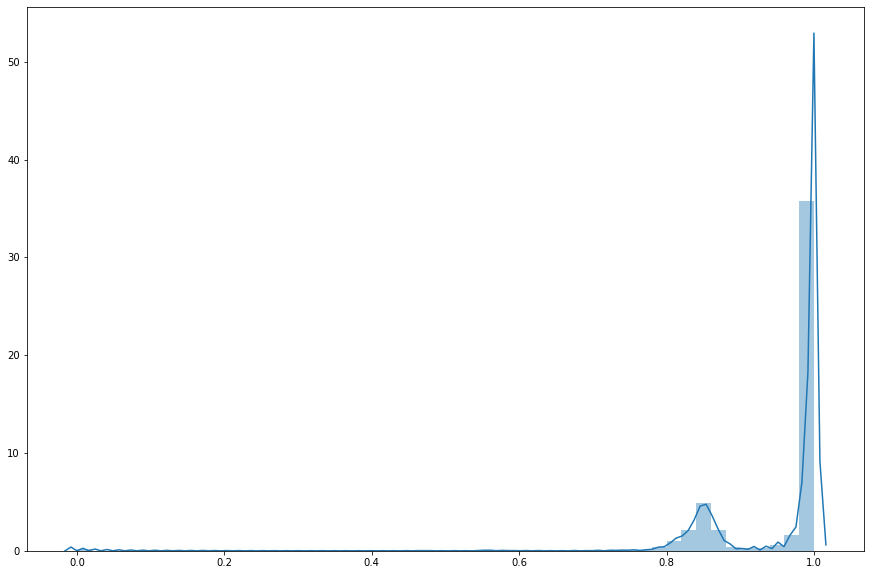

In [85]:
sns.distplot(Similarities)

In [86]:
#
Similarities.describe()

count    10000.000000
mean         0.956093
std          0.090100
min          0.000000
25%          0.956496
50%          1.000000
75%          1.000000
max          1.000000
dtype: float64

Revision de la similaridad entre los campos AVANCE EFECTO CP y AVANCE CAUSA CP

In [87]:
Sample_CP=data[['AVANCE_EFECTO_CP','AVANCE_CAUSA_CP']].sample(n=10000).copy()

In [90]:
Similarities_CP=Sample_CP.apply(lambda x:_similarity_pair(str(x.AVANCE_EFECTO_CP),str(x.AVANCE_CAUSA_CP)),axis=1)

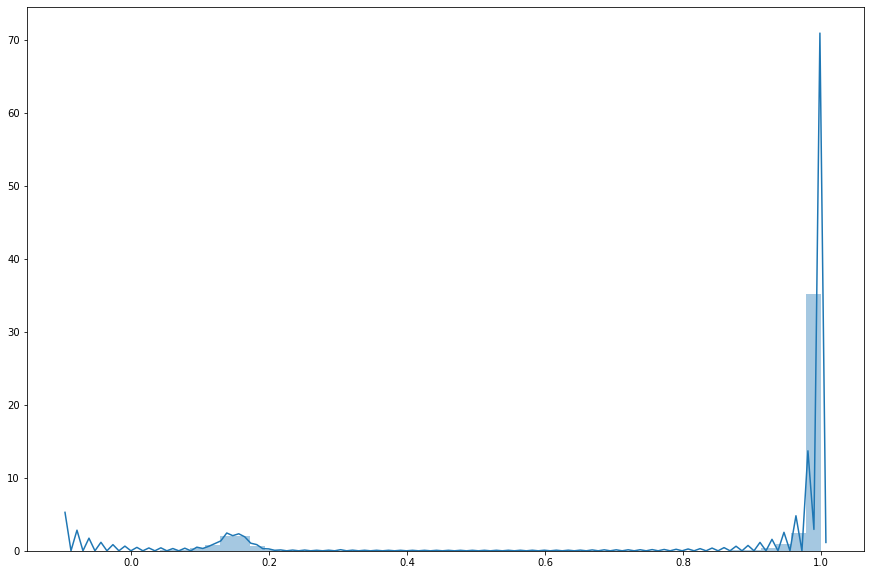

In [91]:
sns.distplot(Similarities_CP)

In [93]:
Similarities_CP.describe()

count    10000.000000
mean         0.872473
std          0.295482
min         -0.088487
25%          0.981250
50%          1.000000
75%          1.000000
max          1.000000
dtype: float64

## KS Test

¿qué tanto son parecidad las distribuciones?

In [94]:
mean1=Similarities.mean()
sdt1=Similarities.std()

mean2=Similarities_CP.mean()
sdt2=Similarities_CP.std()

L1=Similarities.transform(lambda x:(x-mean1)/sdt1)
L2=Similarities_CP.transform(lambda x:(x-mean2)/sdt2)

In [95]:
from scipy.stats import ks_2samp

In [96]:
ks_2samp(Similarities.values,Similarities_CP.values)

Ks_2sampResult(statistic=0.1371, pvalue=2.60438893411519e-82)

In [97]:
ks_2samp(L1,L2)

Ks_2sampResult(statistic=0.5799, pvalue=0.0)

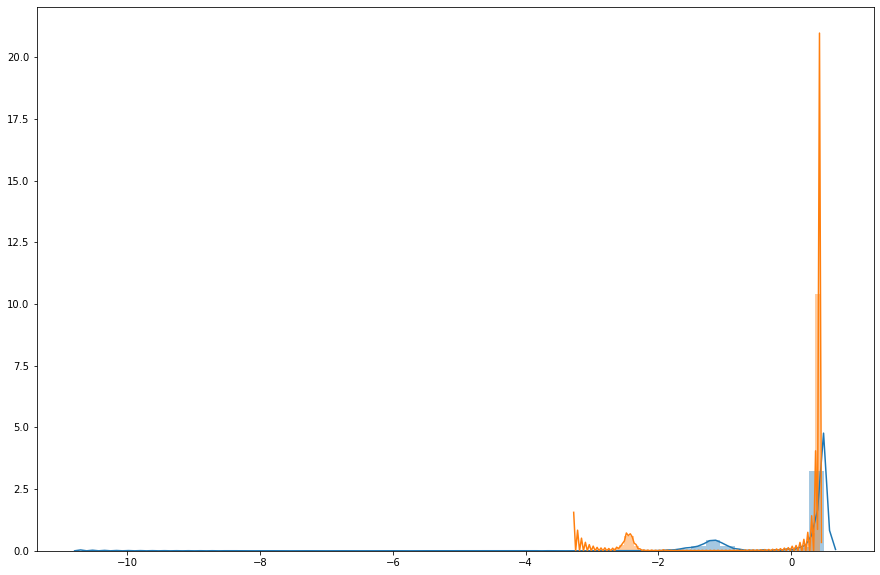

In [98]:
sns.distplot(L1)
sns.distplot(L2)

Text(0.5, 1.0, 'Similitud de Textos Agregados')

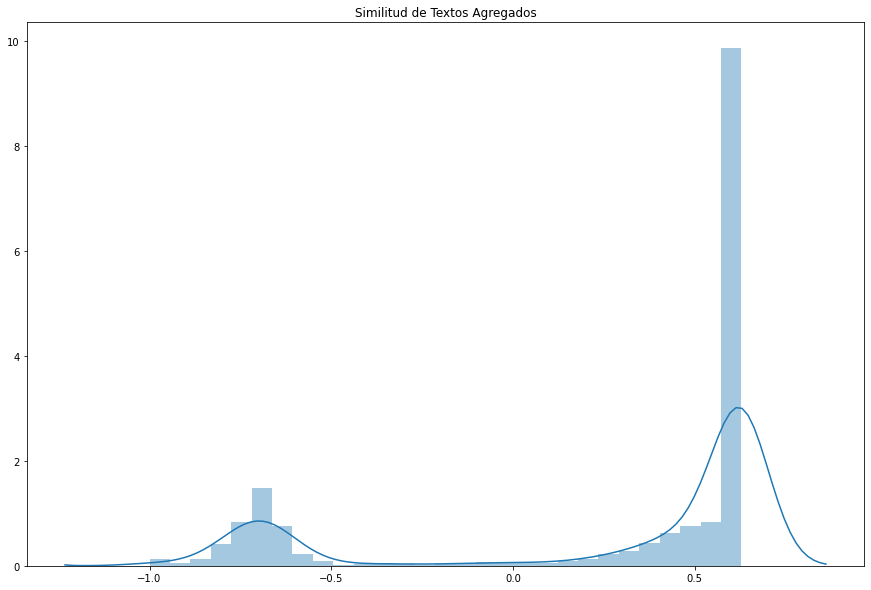

Text(0.5, 1.0, 'Similitud Evento-Causa CP')

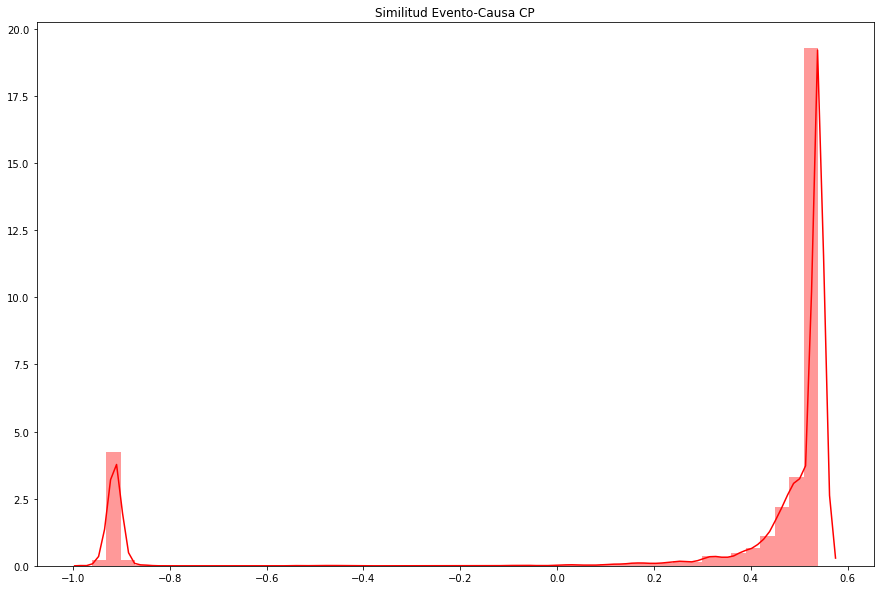

In [104]:
sns.distplot(np.expm1(L1))
plt.title("Similitud de Textos Agregados")
plt.show()
sns.distplot(np.expm1(L2),color='red')
plt.title("Similitud Evento-Causa CP")


Cómo se ve un resumen de los textos?

In [125]:
from pnud_textanalysis.summarization import *

In [128]:
print("Original\n")
print(DF1[0])
print()
print("Resumen\n")
print(text_summarizer(DF1[0])[0])

Original

Durante el mes de junio se observa un ligero incremento en la actividad legislativa respecto al mes anterior, lo cual indica mayor actividad legislativa de la Comisión Permanente. Asimismo, al primer semestre del año se observa un avance del 47.6 % de la meta anual programada, por lo que siguiendo la misma tendencia se podrá cumplir satisfactoriamente con el 95% de asuntos legislativos que la Subsecretaría da registro, trámite, seguimiento y/o análisis. Cabe señalar que el segundo periodo ordinario de sesiones del Congreso de la Unión tiene mayor número de asuntos presentados, ya que sesiona durante 4 meses, por tal motivo, es posible que la meta anual programada sea superada.      Durante el segundo semestre del año, hubo mayor actividad legislativa respecto al primer semestre, aunado a que son cuatro meses de sesiones y no tres. En particular, en el mes de diciembre las Cámaras de Congreso de la Unión sesionaron 3 veces por semana, lo cual fue inusual. Esto ocasionó mayor t

**Pendientes: Revisar las entidades en un modelo de lenguaje y ver si puden ayudar a enter o categorizar los textos.**